In [10]:
segmentation_data = customer_data[['Quantity', 'TotalValue', 'NumProductsPurchased']]
segmentation_data_scaled = scaler.fit_transform(segmentation_data)


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the segmentation data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Handle NaN or infinite values
segmentation_data_scaled = np.nan_to_num(segmentation_data_scaled)

# Ensure correct shape
if len(segmentation_data_scaled.shape) == 1:
    segmentation_data_scaled = segmentation_data_scaled.reshape(-1, 1)

# Finding the best number of clusters using DB Index
best_db_index = float('inf')
best_k = 0
best_kmeans = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_data_scaled)

    db_index = davies_bouldin_score(segmentation_data_scaled, kmeans.labels_)
    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k
        best_kmeans = kmeans

print(f"Best number of clusters: {best_k}")
print(f"DB Index: {best_db_index}")


C:\Users\ASUS VIVOKBOOK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS VIVOKBOOK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS VIVOKBOOK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS VIVOKBOOK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

Best number of clusters: 2
DB Index: 0.7484486814057515


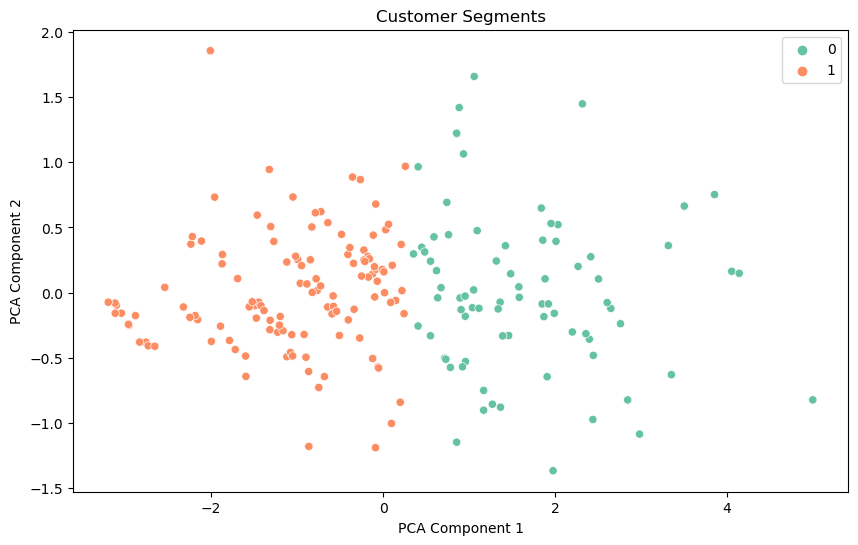

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(segmentation_data_scaled)

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=best_kmeans.labels_, palette='Set2')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
